In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

In [ ]:
data = pd.read_csv('/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [4]:
data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


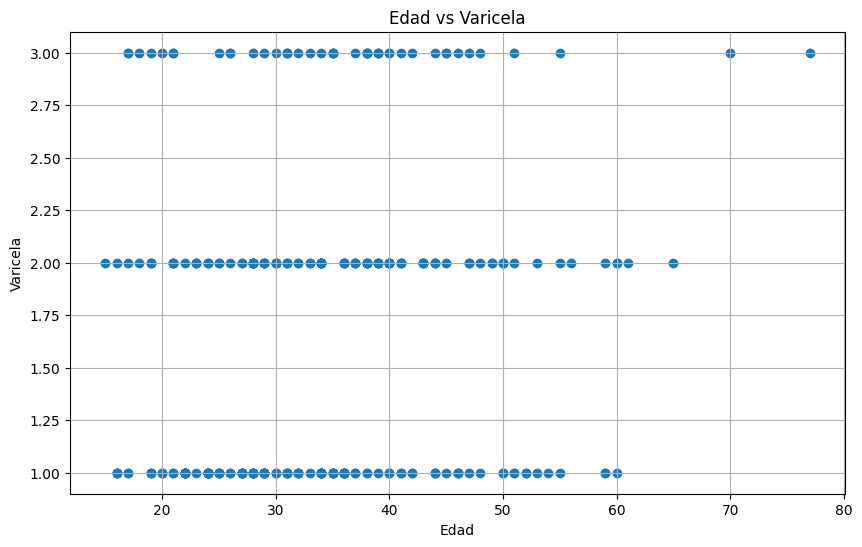

In [15]:
#edad vs varicela
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Varicella'])
plt.xlabel('Edad')
plt.ylabel('Varicela')
plt.title('Edad vs Varicela')
plt.grid(True)
plt.show()

